1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

2. Модифицировать решение первого задания путем добавления L2 регуляризации и сравнить результаты.  
3. [\*] Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.
4. [\*] Построить график изменения весов от числа итераций при GD и SGD (на одном рисунке).
5. [\*] Построить график изменения весов для L1 и L2 регуляризации от коэффициента регуляризации.

In [73]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

# сгенерируем набор данных
X, y, coef = datasets.make_regression(n_samples=100, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

In [74]:
#  data, target, coef = datasets.make_regression(n_samples=10000, n_features = 2, n_informative = 2, n_targets = 1, noise = 5, coef = True, random_state = 2)

((array([ 1.,  2.,  5., 15., 15., 19., 23., 11.,  4.,  5.]),
  array([-2.6197451, -2.169152 , -1.7185589, -1.2679658, -0.8173727,
         -0.3667796,  0.0838135,  0.5344066,  0.9849997,  1.4355928,
          1.8861859]),
  <BarContainer object of 10 artists>),
 (array([ 4., 13.,  9., 19., 19., 18.,  7.,  6.,  3.,  2.]),
  array([-1.98756891, -1.51679511, -1.0460213 , -0.57524749, -0.10447368,
          0.36630013,  0.83707393,  1.30784774,  1.77862155,  2.24939536,
          2.72016917]),
  <BarContainer object of 10 artists>))

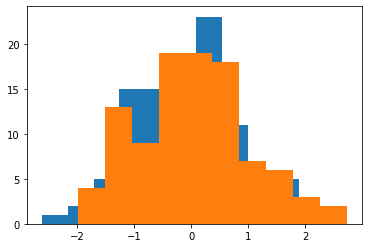

In [75]:
# строим гистограмму распределения стандартизированного признака X[:, 1]

plt.hist(X[:, 0]), plt.hist(X[:, 1])

In [76]:
# стандартизируем признаки X, так как исходные данные имеют характер распределения

X_st = X.copy().astype(np.float64)

In [77]:
# функция стандартизирования признаков 

def calc_std_feat(x):
    s = (x - x.mean()) / x.std()
    return s

In [78]:
X_st[:, 0] = calc_std_feat(X[:, 0])
X_st[:, 1] = calc_std_feat(X[:, 1])

In [79]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(y, y_pred):
    return (sum((y - y_pred)**2)) / len(y)

In [80]:
# Метод градиентного спуска
alpha=1e-2
iterations = 10000 # максимальное число итераций
np.random.seed(42)
n = X_st.shape[0] # число наблюдений
w_GD = np.random.randn(X_st.shape[1])# начальное приближение весов методом GD
w_SGD = np.random.randn(X_st.shape[1])# начальное приближение весов методом GD 
# w_SGD = np.zeros(2) # инициализируем начальный вектор весов для SGD
w_list_GD  = [] # список векторов весов после каждой итерации GD
w_list_SGD  = [] # список векторов весов после каждой итерации SGD
mserror_list_GD = [] # список значений ошибок после каждой итерации GD
mserror_list_SGD = [] # список значений ошибок после каждой итерации SGD
    
for i in range(1, iterations + 1):
    
    y_pred_GD = np.dot(X_st, w_GD) 
    w_GD -= alpha * (1/n * 2 * np.dot((y_pred_GD - y), X_st))
    w_list_GD.append(w_GD.copy())
    mserror_GD = mserror(y, y_pred_GD)
    mserror_list_GD.append(mserror_GD.copy())
    
    train_ind = np.random.randint(X_st.shape[0]) # генерируем случайный индекс объекта выборки
    w_SGD = w_SGD - 2 * alpha * np.dot(X_st[train_ind].T, (np.dot(X_st[train_ind], w_SGD) - y[train_ind])) / y.shape[0]
    w_list_SGD.append(w_SGD.copy())
    
    y_pred_SGD = np.dot(X_st, w_SGD)
    mserror_SGD = mserror(y, y_pred_SGD)
    mserror_list_SGD.append(mserror_SGD.copy())

#     if i % 100 == 0:
#         print(i, w_GD,  mserror_GD, w_SGD,  mserror_SGD)



Text(0, 0.5, 'MSE')

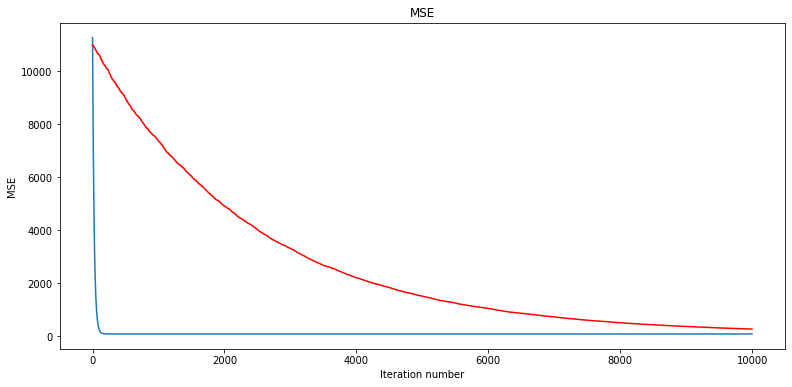

In [81]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize=(13, 6))
plt.plot(range(len(mserror_list_GD)), mserror_list_GD)
plt.plot(range(len(mserror_list_SGD)), mserror_list_SGD,c='r')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

4. [\*] Построить график изменения весов от числа итераций при GD и SGD (на одном рисунке).


Text(0, 0.5, 'Веса')

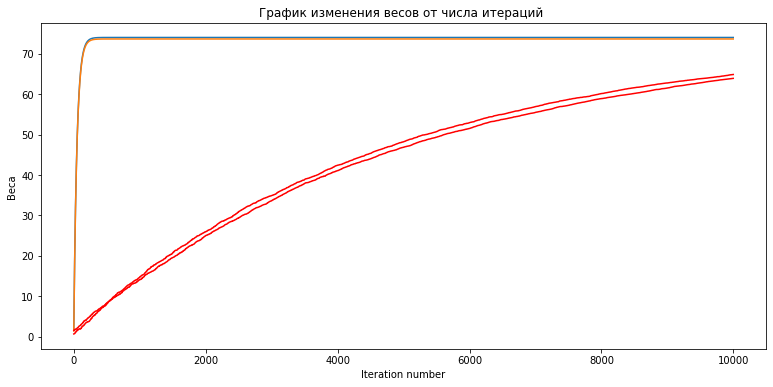

In [82]:
# График изменения весов от числа итераций
plt.figure(figsize=(13, 6))
plt.plot(range(len( w_list_GD)),  w_list_GD)
plt.plot(range(len( w_list_SGD)),  w_list_SGD,c='r')
plt.title('График изменения весов от числа итераций ')
plt.xlabel('Iteration number')
plt.ylabel('Веса')

Вывод: по количеству итераций метод SGD сходится быстрее, чем GD

### 2. Модифицировать решение первого задания путем добавления L2 регуляризации и сравнить результаты.  

L2 регуляризация - Ridge
$$\sum^{n}_{i=1}L_i(\vec{x}_i,y_i,\vec{w}) + \lambda \sum^{m}_{j=1}w_{j}^{2} \rightarrow \underset{w}{\text{min}}$$

In [83]:
def GD_reg2(X, y, iterations, alpha, lambda_):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = mserror(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + 2 * lambda_ * w)
        if i % (iterations/10) == 0:
            print(i, w, err)
    return w

In [84]:
def SGD_reg2(X, y, iterations, alpha, lambda_):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        train_ind = np.random.randint(X.shape[0])
        new_w = w - 2 * alpha * np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - y[train_ind])) / y.shape[0]- 2 * lambda_ * w
        w = new_w
        y_pred = np.dot(X, w)
        err = mserror(y, y_pred)
        if i % (iterations/10) == 0:
            print(i, w, err)
    return w

In [85]:
GD_reg2(X_st, y, 10000,1e-3 , lambda_=1e-8)

1000 [64.71039503 64.29898701] 263.8767142556401
2000 [72.83743719 72.4582462 ] 86.54869211373429
3000 [73.8659814  73.49143296] 83.70686715962145
4000 [73.99614721 73.62226777] 83.6613243069109
5000 [74.01261942 73.63883639] 83.66059440329589
6000 [74.01470385 73.6409347 ] 83.66058270059038
7000 [74.0149676  73.64120046] 83.66058251236062
8000 [74.01500097 73.64123412] 83.6605825092574
9000 [74.01500519 73.64123838] 83.66058250919674
10000 [74.01500573 73.64123892] 83.66058250919437


array([74.01500573, 73.64123892])

In [86]:
GD_reg2(X_st, y, 10000, 1e-3, lambda_=0)

1000 [64.71039547 64.29898744] 263.87669738182655
2000 [72.83743785 72.45824685] 86.54868890852549
3000 [73.86598211 73.49143366] 83.70686672393128
4000 [73.99614792 73.62226848] 83.66132425106989
5000 [74.01262014 73.6388371 ] 83.66059439621164
6000 [74.01470456 73.64093542] 83.66058269969238
7000 [74.01496831 73.64120117] 83.66058251224597
8000 [74.01500169 73.64123483] 83.66058250924198
9000 [74.01500591 73.6412391 ] 83.66058250919384
10000 [74.01500644 73.64123964] 83.66058250919306


array([74.01500644, 73.64123964])

In [87]:
SGD_reg2(X_st, y, 100000, 1e-3, lambda_=0)

10000 [14.3071739 13.2146878] 7533.285975685612
20000 [25.13991543 24.71782883] 5020.508094643457
30000 [34.21210954 33.84531307] 3354.042784037141
40000 [41.65771067 41.33572777] 2241.8749876057727
50000 [47.52878643 47.27826422] 1525.325018876588
60000 [52.50192203 52.16393267] 1037.6164676062099
70000 [56.61171045 56.20778552] 710.0736142471013
80000 [59.78469545 59.40037832] 502.06471811646657
90000 [62.4299456 62.0702863] 360.426736638236
100000 [64.64371292 64.22030563] 265.94291633802237


array([64.64371292, 64.22030563])

In [88]:
SGD_reg2(X_st, y, 100000, 1e-3, lambda_=1e-8)

10000 [14.30574836 13.21343427] 7533.618111289982
20000 [25.13510378 24.71331903] 5021.449214781079
30000 [34.2027721  33.83629301] 3355.5514259824577
40000 [41.64320876 41.32157079] 2243.788491358376
50000 [47.5088133  47.25866277] 1527.4849571956481
60000 [52.47660607 52.1389548 ] 1039.849821351457
70000 [56.58135434 56.17770966] 712.2487905868122
80000 [59.74929114 59.36537005] 504.1367989581506
90000 [62.39014741 62.03096117] 362.3213752776476
100000 [64.60006664 64.1768559 ] 267.63645302288165


array([64.60006664, 64.1768559 ])

Странно, но различий в добавлении  L2-регуляризации не обнаружил

### 3. [\*] Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.


In [89]:
def GD_reg1(X, y, iterations, alpha, lambda_):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = mserror(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_)
        if i % (iterations/10) == 0:
            print(i, w, err)
    return w

In [90]:
def SGD_reg1(X, y, iterations, alpha, lambda_):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        train_ind = np.random.randint(X.shape[0])
        new_w = w - 2 * alpha * np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - y[train_ind])) / y.shape[0]- lambda_
        w = new_w
        y_pred = np.dot(X, w)
        err = mserror(y, y_pred)
        if i % (iterations/10) == 0:
            print(i, w, err)
    return w

In [91]:
GD_reg1(X_st, y, 10000,1e-4 , lambda_=1e-8)

1000 [14.213826   13.62481425] 7496.885032147875
2000 [25.37160094 24.8204669 ] 4988.852006228428
3000 [34.44755712 33.92763527] 3329.3336518938395
4000 [41.83011838 41.33591615] 2231.2615191306104
5000 [47.83523715 47.36222854] 1504.6878069167944
6000 [52.71991599 52.26437145] 1023.9276231110919
7000 [56.6932063  56.25205259] 705.8176351750419
8000 [59.92515494 59.49585963] 495.33022782404737
9000 [62.55408158 62.1345579 ] 356.0546614052746
10000 [64.69249835 64.28102673] 263.8986332117778


array([64.69249835, 64.28102673])

In [92]:
GD_reg2(X_st, y, 10000,1e-4 , lambda_=1e-8)

1000 [14.21382599 13.62481423] 7496.885035278314
2000 [25.37160089 24.82046685] 4988.852015347032
3000 [34.44755703 33.92763518] 3329.333666638141
4000 [41.83011824 41.33591601] 2231.2615379428676
5000 [47.83523695 47.36222834] 1504.6878280351023
6000 [52.71991574 52.2643712 ] 1023.9276450004518
7000 [56.693206   56.25205229] 705.8176566686842
8000 [59.92515459 59.49585928] 495.33024812582084
9000 [62.55408119 62.13455751] 356.05468003409305
10000 [64.69249791 64.2810263 ] 263.89864992973185


array([64.69249791, 64.2810263 ])

In [93]:
SGD_reg1(X_st, y, 100000, 1e-4, lambda_=1e-8)

10000 [2.01036953 1.3200553 ] 10835.313661637376
20000 [3.43817812 2.83218458] 10401.729090460458
30000 [4.87298019 4.27937618] 9985.369964604975
40000 [6.28892155 5.70915069] 9582.664818140714
50000 [7.63118617 7.07564923] 9207.104435951645
60000 [8.99393558 8.427739  ] 8838.308184398991
70000 [10.35499298  9.77651161] 8477.780368609738
80000 [11.62149049 11.06072332] 8145.343011224846
90000 [12.90366399 12.35793017] 7815.999767140582
100000 [14.18420112 13.60274453] 7500.218170885666


array([14.18420112, 13.60274453])

In [94]:
SGD_reg2(X_st, y, 100000, 1e-4, lambda_=1e-8)

10000 [2.01021904 1.32003765] 10835.338673048394
20000 [3.43758867 2.83185386] 10401.863336989763
30000 [4.87167835 4.27844588] 9985.689040468067
40000 [6.28663882 5.70734946] 9583.236662138232
50000 [7.62767052 7.07271773] 9207.989204804833
60000 [8.98894342 8.42343153] 8839.558382023131
70000 [10.34828867  9.77058959] 8479.442509416749
80000 [11.61284175 11.05295822] 8147.46059637349
90000 [12.89286532 12.34811129] 7818.604866185593
100000 [14.17105015 13.5906566 ] 7503.341443172394


array([14.17105015, 13.5906566 ])

In [95]:
SGD_reg1(X_st, y, 100000, 1e-3, lambda_=0)

10000 [14.3071739 13.2146878] 7533.285975685612
20000 [25.13991543 24.71782883] 5020.508094643457
30000 [34.21210954 33.84531307] 3354.042784037141
40000 [41.65771067 41.33572777] 2241.8749876057727
50000 [47.52878643 47.27826422] 1525.325018876588
60000 [52.50192203 52.16393267] 1037.6164676062099
70000 [56.61171045 56.20778552] 710.0736142471013
80000 [59.78469545 59.40037832] 502.06471811646657
90000 [62.4299456 62.0702863] 360.426736638236
100000 [64.64371292 64.22030563] 265.94291633802237


array([64.64371292, 64.22030563])

Вывод: для SGD оптимальнее L2-регуляризация, для GD регуляризация L1-L2 не солько значима

### 5. [\*] Построить график изменения весов для L1 и L2 регуляризации от коэффициента регуляризации ... (lambda?).

In [102]:
w_list_GD_L1  = []
w_list_GD_L2 = []
w_list_SGD_L1  = []
w_list_SGD_L2  = []


for l in range(0, 11):
    w1 = GD_reg1(X_st, y, 10000,1e-4 , lambda_=10^(-l)-1)
    w2 = GD_reg2(X_st, y, 10000,1e-4 , lambda_=10^(-l)-1)
 
    w_list_GD_L1.append(w1.copy())
    w_list_GD_L2.append(w2.copy())
   

                 
                    

1000 [15.20779073 14.61877897] 7253.204120373666
2000 [27.17409422 26.62296018] 4632.912568156374
3000 [36.90773815 36.3878163 ] 2939.1376223588873
4000 [44.82528753 44.3310853 ] 1850.954578114223
5000 [51.26558589 50.79257728] 1157.4065973824859
6000 [56.5042563  56.04871175] 720.0406303588627
7000 [60.76549676 60.32434304] 448.1666230413884
8000 [64.23167494 63.80237964] 282.5264387776479
9000 [67.05113278 66.63160909] 184.5199716782545
10000 [69.34453483 68.93306321] 129.10236432278896
1000 [52.16171758 47.21735332] 1308.1303383917386
2000 [430.91053399 393.98172967] 236296.90853520107
3000 [3207.48311284 2933.1644682 ] 18498964.13625269
4000 [23562.41882546 21526.18294315] 1040322899.2801437
5000 [172784.6171886  157671.35851466] 56201112531.77476
6000 [1266741.39129919 1154569.92725894] 3019787965849.9404
7000 [9286659.89808108 8454118.40953012] 162139586830201.25
8000 [68081992.31947123 61902834.64061434] 8704797556952631.0
9000 [4.99123292e+08 4.53261327e+08] 4.673292343289344e+

Text(0, 0.5, 'Веса')

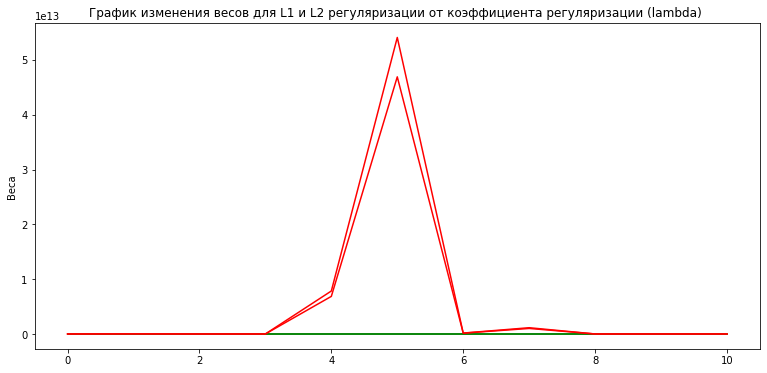

In [103]:
# График изменения весов от числа итераций
plt.figure(figsize=(13, 6))
plt.plot(range(len( w_list_GD_L1)),  w_list_GD_L1, c='g')
plt.plot(range(len( w_list_GD_L2)),  w_list_GD_L2,c='r')
plt.title('График изменения весов для L1 и L2 регуляризации от коэффициента регуляризации (lambda) ')
plt.xlabel('')
plt.ylabel('Веса')

In [104]:

w_list_SGD_L1  = []
w_list_SGD_L2  = []

for l in range(0, 10):
    w3 = SGD_reg1(X_st, y, 10000,1e-4 , lambda_=10^(-l)-1)
    w4 = SGD_reg2(X_st, y, 10000,1e-4 , lambda_=10^(-l)-1)
    w_list_SGD_L1.append(w3.copy())
    w_list_SGD_L2.append(w4.copy())

1000 [10989.00896725 10989.61459857] 245997852.66911387
2000 [21955.01611808 21956.50669261] 988590918.2985779
3000 [32899.30411587 32903.1601471 ] 2224939970.478328
4000 [43817.53289458 43824.6345113 ] 3951362181.077181
5000 [54718.20331394 54727.41367474] 6166082565.105335
6000 [65598.68808866 65612.79678289] 8866473459.668495
7000 [76450.32971791 76474.24914536] 12047605483.705944
8000 [87279.81235715 87301.62965987] 15705307008.513922
9000 [98082.40006195 98124.33980559] 19840799400.63769
10000 [108867.71905604 108901.77330026] 24445006700.89056
1000 [nan nan] nan
2000 [nan nan] nan
3000 [nan nan] nan
4000 [nan nan] nan
5000 [nan nan] nan
6000 [nan nan] nan


/var/folders/g3/bnjh0tnx5sb623ptvdxgc7v00000gn/T/ipykernel_1126/2986637742.py:3: RuntimeWarning: overflow encountered in double_scalars
  return (sum((y - y_pred)**2)) / len(y)
/var/folders/g3/bnjh0tnx5sb623ptvdxgc7v00000gn/T/ipykernel_1126/2986637742.py:3: RuntimeWarning: overflow encountered in square
  return (sum((y - y_pred)**2)) / len(y)
/var/folders/g3/bnjh0tnx5sb623ptvdxgc7v00000gn/T/ipykernel_1126/2719114384.py:7: RuntimeWarning: overflow encountered in multiply
  new_w = w - 2 * alpha * np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - y[train_ind])) / y.shape[0]- 2 * lambda_ * w
/var/folders/g3/bnjh0tnx5sb623ptvdxgc7v00000gn/T/ipykernel_1126/2719114384.py:7: RuntimeWarning: invalid value encountered in subtract
  new_w = w - 2 * alpha * np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - y[train_ind])) / y.shape[0]- 2 * lambda_ * w


7000 [nan nan] nan
8000 [nan nan] nan
9000 [nan nan] nan
10000 [nan nan] nan
1000 [11987.95048496 11988.67023265] 293086404.3416729
2000 [23950.8533561  23952.53908978] 1177162257.6470728
3000 [35890.06298134 35894.32978598] 2648846610.493655
4000 [47800.84384519 47808.6517292 ] 4703756324.0363
5000 [59692.4709569  59702.57955317] 7339779486.476372
6000 [71562.07746864 71577.53027879] 10553788913.6215
7000 [83400.21821484 83426.37437644] 14339917810.1468
8000 [95214.18551852 95238.04830254] 18693201480.69138
9000 [106998.81267117 107044.62855183] 23615094185.585743
10000 [118764.60165491 118801.81449535] 29094793859.321587
1000 [nan nan] nan
2000 [nan nan] nan
3000 [nan nan] nan
4000 [nan nan] nan
5000 [nan nan] nan
6000 [nan nan] nan
7000 [nan nan] nan
8000 [nan nan] nan
9000 [nan nan] nan
10000 [nan nan] nan
1000 [8991.12593182 8991.50333039] 164183815.3855839
2000 [17963.34164206 17964.44189828] 660798467.1648213
3000 [26917.78638492 26920.82086935] 1487946882.1333838
4000 [35850.91

/var/folders/g3/bnjh0tnx5sb623ptvdxgc7v00000gn/T/ipykernel_1126/2719114384.py:7: RuntimeWarning: overflow encountered in subtract
  new_w = w - 2 * alpha * np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - y[train_ind])) / y.shape[0]- 2 * lambda_ * w


5000 [nan nan] nan
6000 [nan nan] nan
7000 [nan nan] nan
8000 [nan nan] nan
9000 [nan nan] nan
10000 [nan nan] nan
1000 [2997.47682553 2997.16952588] 17646232.027702052
2000 [5988.31821398 5988.24751529] 72222934.26946646
3000 [8973.2331921  8973.80303611] 163529150.5842894
4000 [11951.04528972 11952.49676809] 291291487.88267684
5000 [14924.06217024 14926.08664731] 455376990.817332
6000 [17891.57304883 17894.92881564] 655590308.8990918
7000 [20851.22174253 20857.2472967 ] 891565641.642787
8000 [23804.82706623 23810.28051851] 1162992927.4950302
9000 [26751.09918822 26762.02983569] 1469961547.2351034
10000 [29692.6582651  29701.44373956] 1811798275.5156395
1000 [nan nan] nan
2000 [nan nan] nan
3000 [nan nan] nan
4000 [nan nan] nan
5000 [nan nan] nan
6000 [nan nan] nan
7000 [nan nan] nan
8000 [nan nan] nan
9000 [nan nan] nan
10000 [nan nan] nan
1000 [3996.41834325 3996.22515996] 31766607.536025416
2000 [7984.15545199 7984.27991246] 129193666.78265919
3000 [11963.99205757 11964.97267498] 2